# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 12


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  40 баллов
* Задача 2 &mdash;  60 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash;  20 баллов
* Задача 4 &mdash;  40 баллов







-----

In [ ]:
# Bot check

# HW_ID: phds_hw12
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Импорты из sklearn:

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet

## Задача 1

Реализуйте функции:

- скользящего среднего
- экспоненциального сглаживания
- двойного эскпоненциального сглаживания (метод Хольта)

Визуализируйте результаты работы функций.




### 0. Загрузка данных

#### **Профиль физика**


В этой задаче мы будем работать с данными по электропотреблению. Данные можете скачать с [сайта](https://miptstats.github.io/courses/ad_mipt.html).

In [3]:
file_path = 'data_phys_12.csv' # путь до файла с данными
data = pd.read_csv(file_path, index_col=[0], parse_dates=[0])
data.head()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


Мы будем работать с колонкой `nat_demand`. Проверьте, есть ли в этом столбце пропуски. Если да - удалите эти строки.

In [4]:
data['nat_demand'].isna().sum()

0

Визуализируйте, как изменяется таргет с течением времени. Какие зависимости вы можете увидеть?

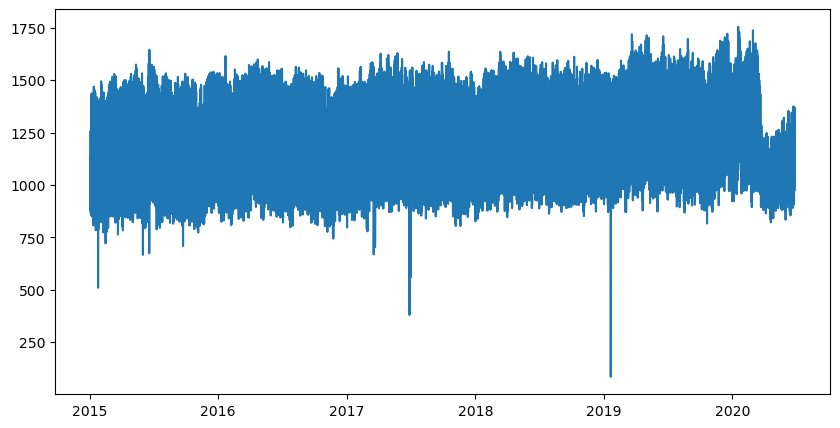

In [5]:
plt.figure(figsize=(10,5))
plt.plot(data['nat_demand'])

По данной визуализации данных ничего нельзя сказать о периодичности или трендах, так как они слишком зашумлены. Для того чтобы данные стали информативнее, нужно их сгладить

#### **Профиль биология**

В этом домашнем задании мы будем работать с данными о сердцебиении человека во время сна. Скачать и изучить подробнее [здесь](https://www.kaggle.com/datasets/jacekmakola/goodnight1). 

In [ ]:
data = pd.read_csv('hrb_sample_1.csv')
data

Формат данных достаточно специфичен. Очистим нашу таблицу от ненужной информации.

In [ ]:
data = pd.DataFrame(data.values, columns=data.loc[1])
data = data.drop(0)
data = data.drop(1)
data.tail()

Уберем лишние колонки.

In [ ]:
data = data[['Time', 'HR (bpm)']]

Колонку `Time` преобразуем к правильному типу данных и поставим вместо индексов.

In [ ]:
data["Time"] = pd.to_datetime(data['Time'])
data = data.set_index('Time')

Посмотрим, в каком формате хранятся данные о сердцебиении.

In [ ]:
type(data['HR (bpm)'][0])

Переведите значения `HR (bpm)` к целым числам.

In [ ]:
<...>

Визуализируйте, как изменяется таргет с течением времени. Какие зависимости вы можете увидеть?

In [ ]:
<...>


### 1. Скользящее среднее

In [6]:
def moving_average(series:pd.Series, n:int)->pd.Series:
    '''
    series:pd.Series - исходные данные 
    n:int - величина скользящего окна

    output:pd.Series - сглаженные данные
    '''

    rolled_mean = series.rolling(window=n).mean()
    return rolled_mean

Нарисуйте на одном графике исходные данные и обработанные скользящим средним. Рассмотрите минимум **два** разных `n` и обоснуйте свой выбор этих значений.

*Замечание: при корректной реализации функции первые элементы превратятся в NaN, поэтому рисовать график нужно для `series[n:]`*

Напишем функцию для визуализации скользящего среднего и сравнения с исходным графиком необработанных данных:

In [7]:
def moving_aver_plot(series: pd.Series, win:int):
    '''
    series:pd.Series - исходные данные 
    win:int - величина скользящего окна
    Функция строит на одном графике исходные данные
    и усреднённые скользящим окном
    '''
    plt.figure(figsize=(12,6))
    plt.title('Скользящее среднее\n Размер окна = {}'.format(win))
    plt.plot(series[win:], label='Исходные данные')
    plt.plot(moving_average(series, win), label='Сглаженные данные')
    plt.legend()
    plt.grid()

Построим несколько графиков для разных размеров окон.

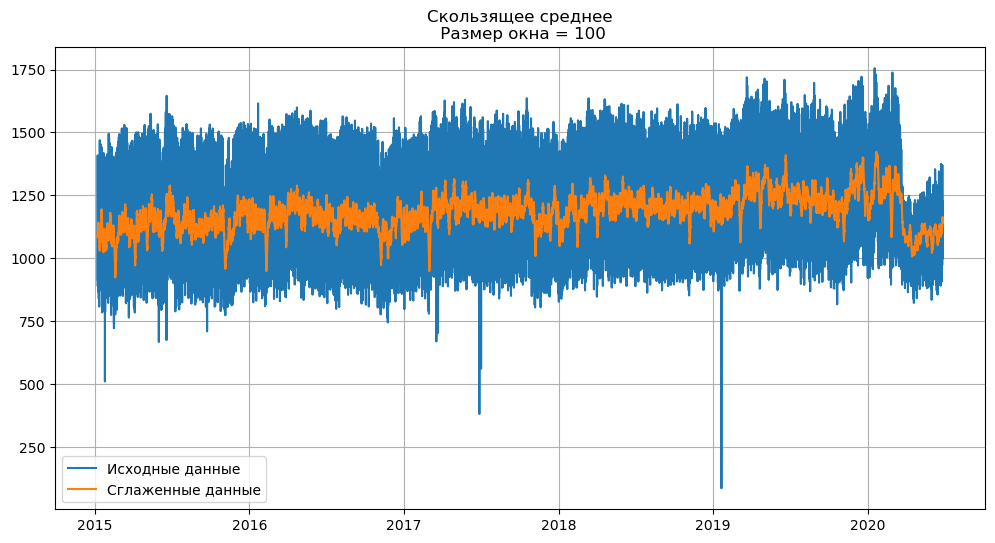

In [8]:
moving_aver_plot(data['nat_demand'], win=100)

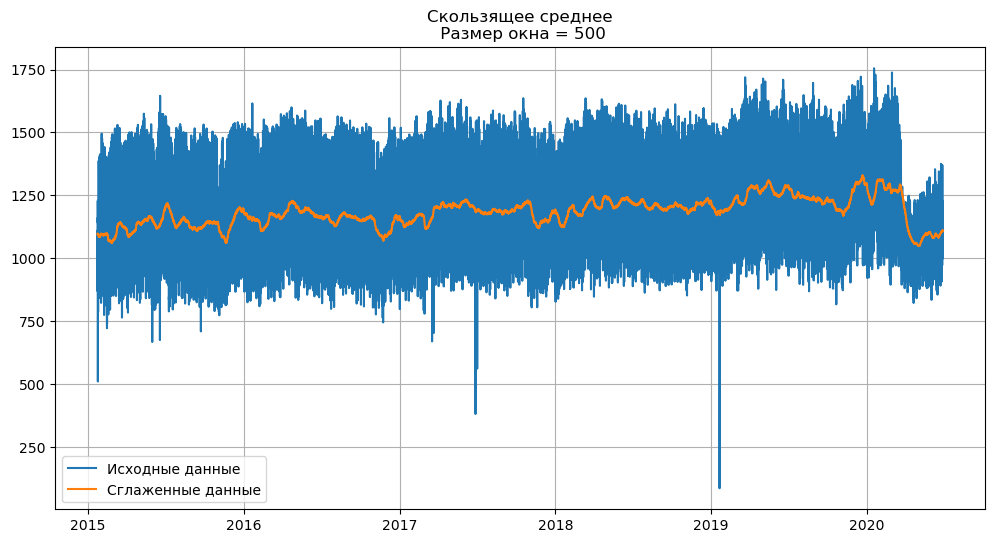

In [9]:
moving_aver_plot(data['nat_demand'], win=500)

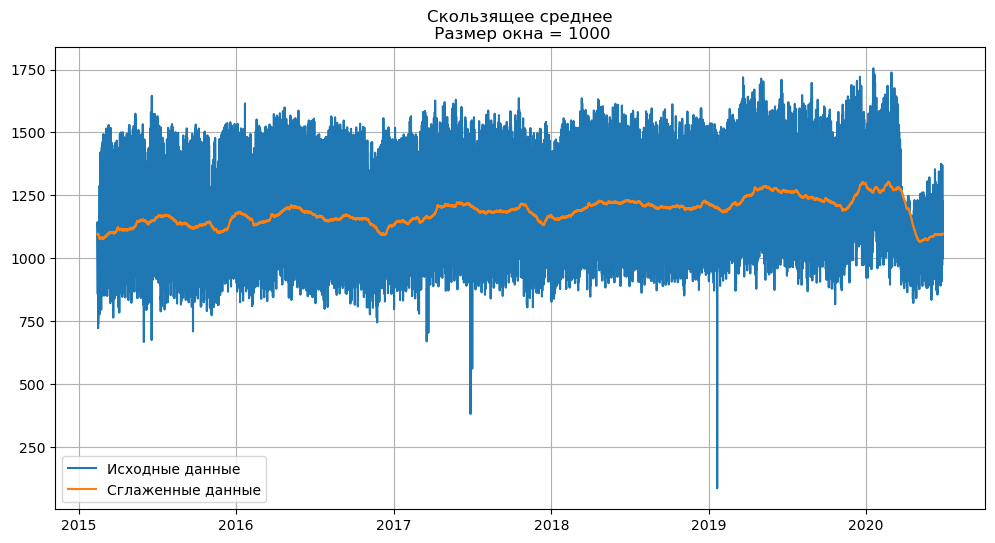

In [10]:
moving_aver_plot(data['nat_demand'], win=1000)

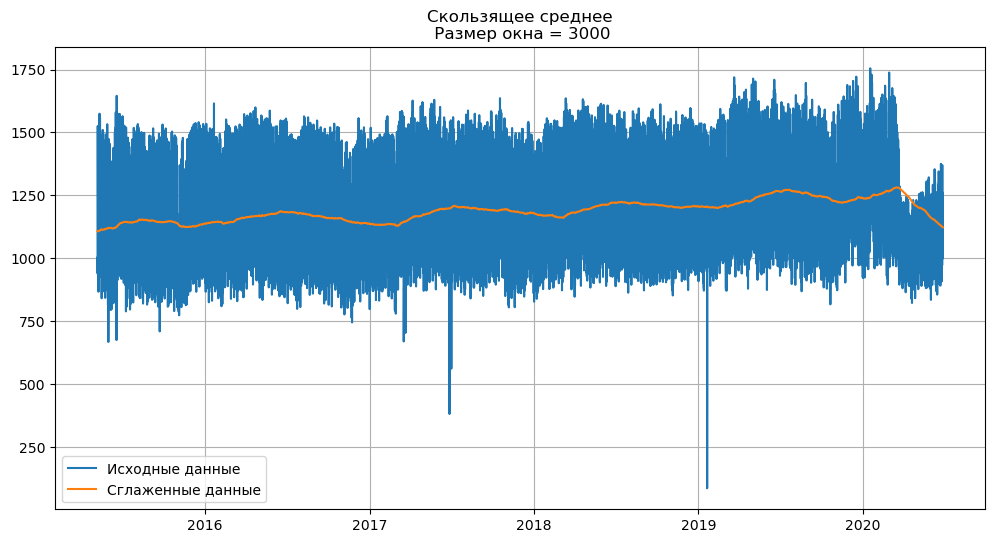

In [11]:
moving_aver_plot(data['nat_demand'], win=3000)

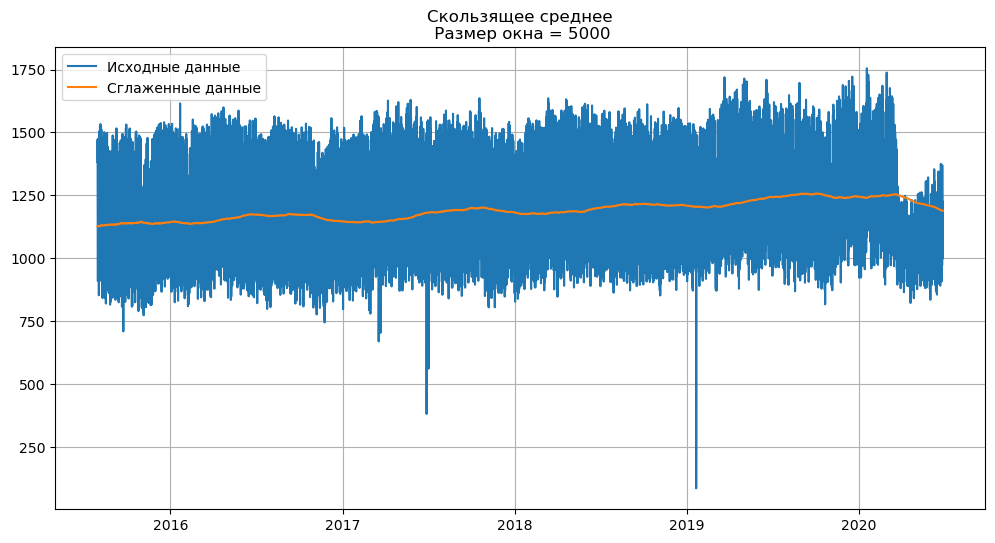

In [12]:
moving_aver_plot(data['nat_demand'], win=5000)

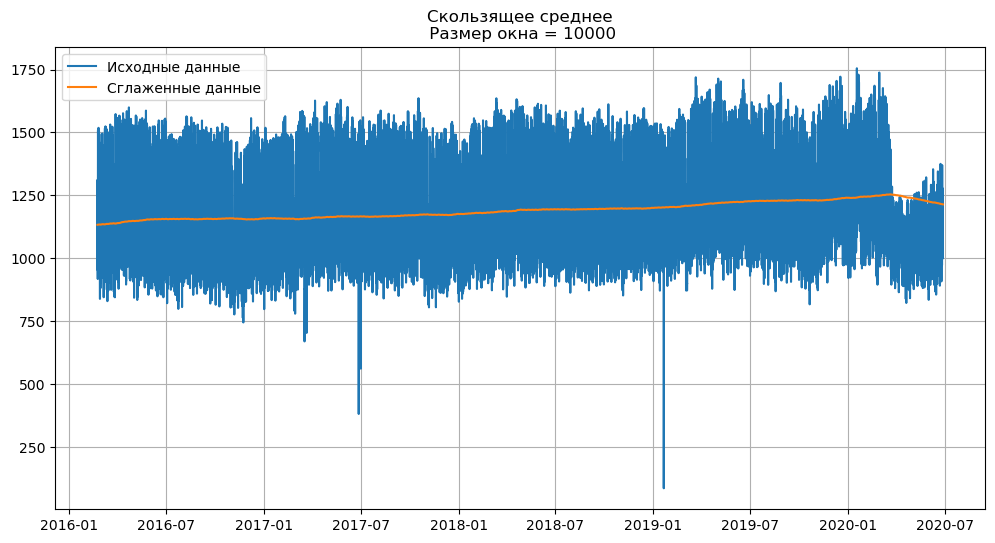

In [14]:
moving_aver_plot(data['nat_demand'], win=10000)

**Вывод:**

Оптимальным размером окна является `win=3000`, что видно из графиков. При меньших значения данные всё ещё достаточно зашумлены, а при больших значениях (например 10000) видно, что начинает сглаживаться сама сезонность, которую мы хотели бы увидеть

### 2. Экспоненциальное сглаживание

Формула, которая опредляет метод сглаживания:
$$
\hat{y}_x = \alpha \cdot y_x + (1 - \alpha) \cdot \hat{y}_{x-1}
$$

In [15]:
def exponential_smoothing(series:pd.Series, alpha:float)->pd.Series:
    '''
    series:pd.Series - исходные данные 
    alpha:float - сглаживающий фактор
    '''
    results = np.ones_like(series)
    
    # Оставляем первое значение таким же как в исходных данных,
    # as there is no history to learn from
    results[0] = series[0] 
    for k in range(1, series.shape[0]):
        results[k] = alpha * series[k] + (1 - alpha) * results[k - 1]

    return pd.Series(results, index=series.index)

Нарисуйте на одном графике исходные данные и обработанные функцией экпоненциального сглаживания. Рассмотрите минимум **два** разных `alpha`. Следите за аккуратностью графика.


In [16]:
def exp_smoth_plot(series:pd.Series, alphas: list):
    '''
    График экспоненциального сглаживания для заданного массива
    коэффициентов сглаживания alphas
    '''
    plt.figure(figsize=(12, 6))
    
    plt.plot(series, label='Исходные данные')
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label=r'$\alpha$ = {}'.format(alpha))

    plt.legend(fontsize=12)
    plt.grid()

В массиве `alphas` значения параметров надо указывать по убыванию, чтобы построенные графики не перекрывали друг друга:

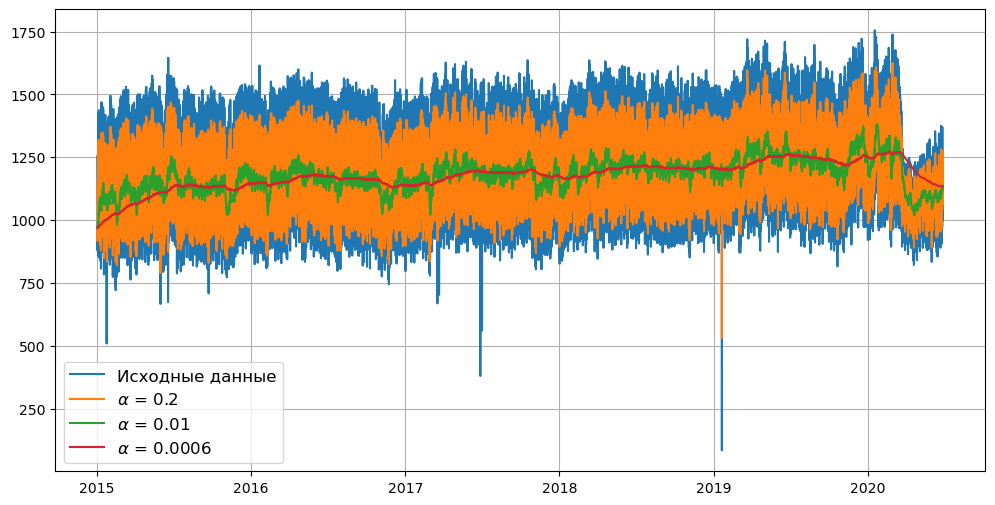

In [17]:
alphs=[0.2, 0.01, 0.0006]
exp_smoth_plot(data['nat_demand'], alphas=alphs)

### 3. Двойное экспоненциальное сглаживание (метод Хольта)

In [19]:
def double_exponential_smoothing(series, alpha:float, beta:float)->pd.Series:
    '''
    series:pd.Series - исходные данные 
    alpha:float - сглаживающий фактор
    beta:float - сглаживающий фактор
    '''
    result = series.copy().astype(float)
    for i in range(len(series)):
        if i == 0:
            result.iloc[i] = series.iloc[i]
        elif i == 1:
            result.iloc[i] = alpha * series.iloc[i] + (1 - alpha) * series.iloc[i-1]
        else:
            result.iloc[i] = alpha*series.iloc[i]+(1 - alpha)*(result.iloc[i-1]+beta*(result.iloc[i-1]-result.iloc[i-2]))
    return result

Нарисуйте на одном графике исходные данные и обработанные функцией двойного экпоненциального сглаживания. Рассмотрите минимум **три** разных пары `alpha` и `beta`. Следите за аккуратностью графика.

Напишем функцию для красивой постройки графиков:

In [20]:
def double_exp_smoth_plot(series:pd.Series, alphas:list, betas:list):
    '''
    Функция строит сглаженные двойным экспненциальным методом
    данные поверх исходных
    '''   
    plt.figure(figsize=(12, 6))
    plt.plot(series, label='Исходные данные')
    
    for alpha, beta in zip(alphas, betas):
        plt.plot(double_exponential_smoothing(series, alpha, beta), label=r'$\alpha$ = {}, $\beta$ = {}'.format(alpha, beta))

    plt.legend(fontsize=12)
    plt.grid()

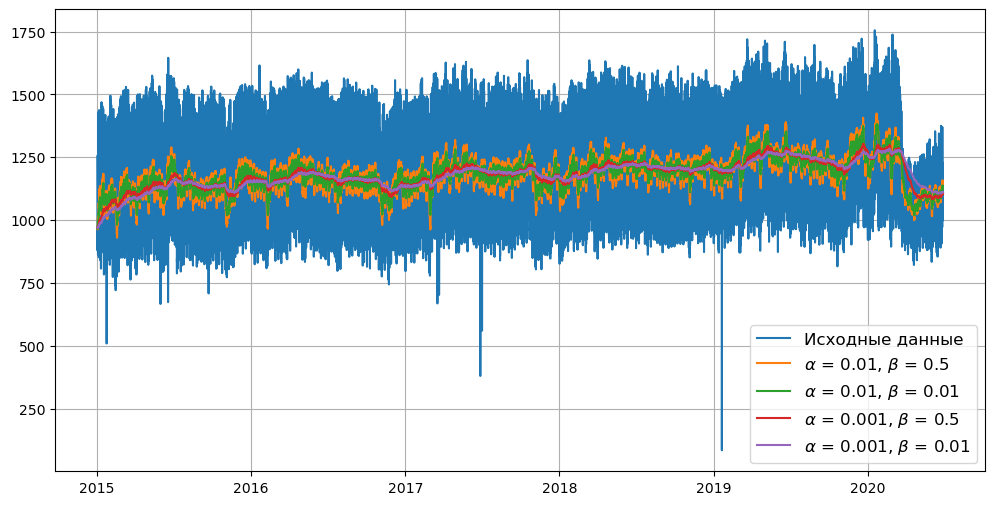

In [21]:
alph = [0.01, 0.01, 0.001, 0.001]
bets = [0.5, 0.01, 0.5, 0.01]
double_exp_smoth_plot(data['nat_demand'], alphas=alph, betas=bets)

Оптимальные (на мой взгляд) значения параметров $\alpha$ и $\beta$:

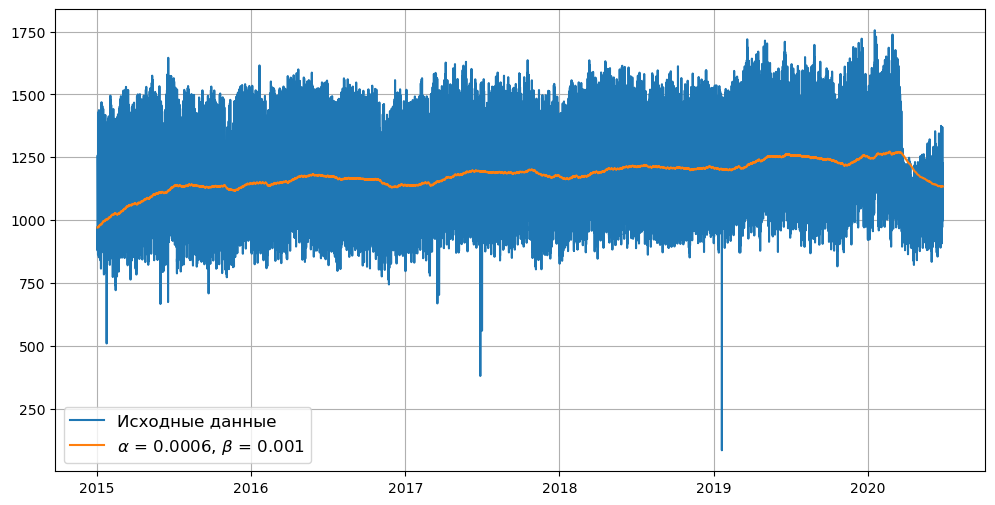

In [73]:
double_exp_smoth_plot(data['nat_demand'], alphas=[0.0006], betas=[0.001])

## Задача 2.

Продолжайте работать с выбранными данными. Разбейте их таким образом, чтобы в тесте остались последние 20% измерений.



In [53]:
data2=data['nat_demand']
data2.shape

(48048,)

In [54]:
train = data2.iloc[:-int(data2.shape[0]*0.2)]
test = data2.iloc[-int(data2.shape[0]*0.2):]
test.shape

(9609,)

### 1. Baseline

В любой задаче машинного обучения сначала полезно строить простые модели, так называемые `baseline`. Сгенерируйте фичи из даты. Поясните свой выбор.

In [106]:
data2

datetime
2015-01-03 01:00:00     970.3450
2015-01-03 02:00:00     912.1755
2015-01-03 03:00:00     900.2688
2015-01-03 04:00:00     889.9538
2015-01-03 05:00:00     893.6865
                         ...    
2020-06-26 20:00:00    1128.5592
2020-06-26 21:00:00    1112.7488
2020-06-26 22:00:00    1081.5680
2020-06-26 23:00:00    1041.6240
2020-06-27 00:00:00    1013.5683
Name: nat_demand, Length: 48048, dtype: float64

In [121]:
def create_date_features(date):
    """Создает фичи из даты"""
    row = {}
    row["dayofweek"] = date.dayofweek 
    row["quarter"] = date.quarter 
    row["month"] = date.month 
    row["year"] = date.year   
    row["weekofyear"] = date.weekofyear 
    return row

def create_only_date_train_features(y_series): 
    """
    Создает обучающий датасет из признаков, полученных из дат для y_series
    """
    time_features = pd.DataFrame(
    [create_date_features(date) for date in y_series.index] )
    return time_features, y_series

In [122]:
X_train, y_train = create_only_date_train_features(train)
X_test, y_test = create_only_date_train_features(test)

In [123]:
X_train

,dayofweek,quarter,month,year,weekofyear
0,5,1,1,2015,1
1,5,1,1,2015,1
2,5,1,1,2015,1
3,5,1,1,2015,1
4,5,1,1,2015,1
...,...,...,...,...,...
38434,3,2,5,2019,21
38435,3,2,5,2019,21
38436,3,2,5,2019,21
38437,3,2,5,2019,21


**Ответ:** Мы исследуем данные по электропотреблению населением. В этом случае не имеет смысла рассматривать отдельно `день из года` и искать здесь какую-то закономерность. В основном мы интуитивно понимаем, что электропотребление в первую очередь зависит от дня недели и времени года, и это периодически повторяется каждый год

Обучите линейную регрессию с регуляризацией и случайный лес на ваших данных. 

In [124]:
linear = ElasticNet(alpha=1, l1_ratio=0.5).fit(X_train, y_train)

forest = RandomForestRegressor().fit(X_train, y_train)

models = [linear, forest]

Визуализируйте полученные прогнозы.

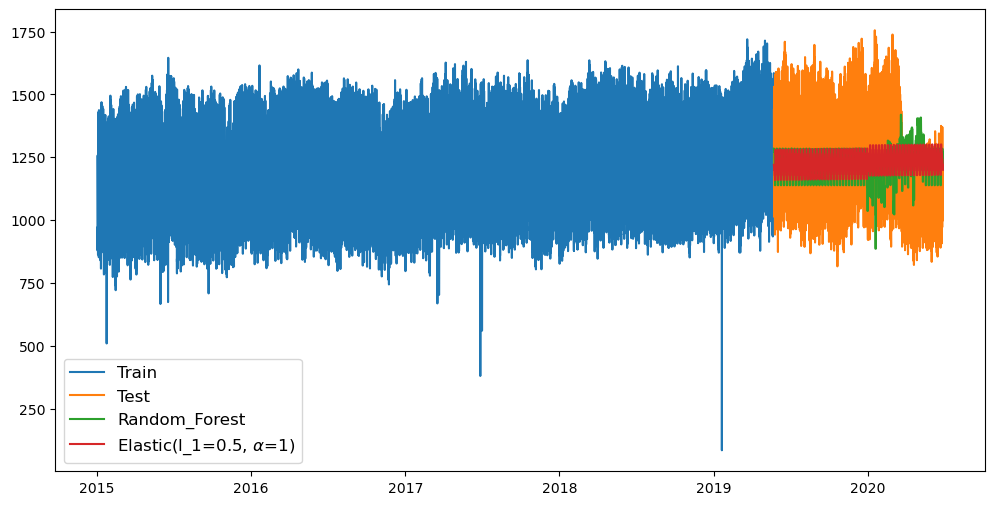

In [128]:
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pd.Series(models[1].predict(X_test), index=test.index), label='Random_Forest')
plt.plot(pd.Series(models[0].predict(X_test), index=test.index), label=r'Elastic(l_1=0.5, $\alpha$=1)')
plt.legend(fontsize=12)

Посчитайте метрики. 

Для этого напишем функцию, считающую сразу 3 разные метрики:

In [126]:
def metrics(models, X_test, y_test):
    for model in models:
        print(f' Модель --> {model} ', f'MSE: {mean_squared_error(y_test, model.predict(X_test)):.4f} ',
             f'MAE: {mean_absolute_error(y_test, model.predict(X_test)):.4f} ',
             f'MAPE: {mean_absolute_percentage_error(y_test, model.predict(X_test)):.4f} ',
             f'r^2: {r2_score(y_test, model.predict(X_test)):.4f} \n', 
              '--'*50)

In [152]:
metrics(models, X_test, y_test)

 Модель --> ElasticNet(alpha=1)  MSE: 34451.4034  MAE: 157.0896  MAPE: 0.1329  r^2: 0.0038 
 ----------------------------------------------------------------------------------------------------
 Модель --> RandomForestRegressor()  MSE: 37282.7875  MAE: 163.2780  MAPE: 0.1386  r^2: -0.0781 
 ----------------------------------------------------------------------------------------------------


### 2. Рекурсивная стратегия

Обучите линейную регрессию с регуляризацией и случайный лес используя рекурсивную стратегию. 

Функция для рекуррентных предсказаний:

In [159]:
def recur_pred(model, test_datas, y_to_train, features_creation_function):
    """
    Функция для реккуррентных предсказний.

    features_creation_function - функция для создания тестовых признаков
    """
    predictions = []
    previous_y = list(y_to_train)

    for date in test_datas:
        row = features_creation_function(date, previous_y)
        curr_test = pd.DataFrame([row])
        curr_prediction = model.predict(curr_test)[0]
        previous_y.append(curr_prediction)
        predictions.append(curr_prediction)
    return np.array(predictions)

In [158]:
elastic_predictions = recur_pred(models[0], test.index, train,
    lambda date, previous_y: create_date_features(date),
)

forest_predictions = recur_pred(models[1], test.index, train,
    lambda date, previous_y: create_date_features(date),
)

Визуализируйте полученные прогнозы.

Посчитайте метрики.

### 3. Временные сдвиги 

Поработаем еще с признаками. На этот раз добавим сдвиги по времени. Таким образом модель сможет использовать информацию из прошлого, для составления прогноза на будущее. Добавьте новые признаки к вашим данным.

Обучите линейную регрессию с регуляризацией и случайный лес на обновленном датасете.

In [ ]:
<...>

Визуализируйте полученные прогнозы.

In [ ]:
<...>

Посчитайте метрики.

In [ ]:
<...>

Сделайте выводы по задаче.

**Вывод:**

## Задача 3.

Используя функции, реализованные в задаче 1, добавьте сглаживание в ваш датасет. Поясните выбор функции сглаживания.

In [144]:
data3=double_exponential_smoothing(data['nat_demand'], alpha=0.0002, beta=0.001)

Обучите линейную регрессию с регуляризацией и случайный лес на обновленном датасете.

In [145]:
train_3 = data3.iloc[:-int(data3.shape[0]*0.2)]
test_3 = data3.iloc[-int(data3.shape[0]*0.2):]
test_3.shape

(9609,)

In [146]:
X_train_3, y_train_3 = create_only_date_train_features(train_3)
X_test_3, y_test_3 = create_only_date_train_features(test_3)

In [153]:
elastic_3 = ElasticNet(alpha=2, l1_ratio=0.5).fit(X_train_3, y_train_3)

forest_3 = RandomForestRegressor(n_estimators=400, random_state=42).fit(X_train_3, y_train_3)

models_3 = [elastic_3, forest_3]

Визуализируйте полученные прогнозы.

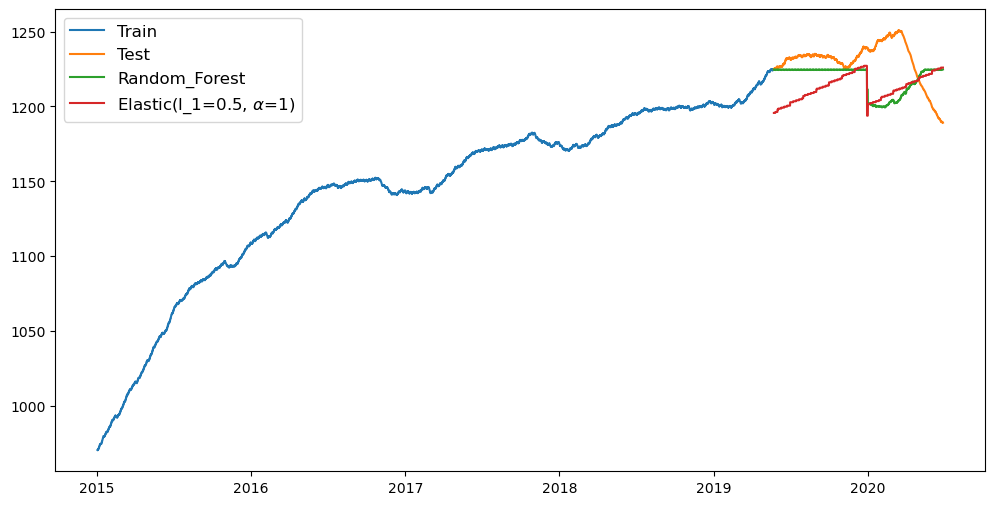

In [154]:
plt.figure(figsize=(12,6))
plt.plot(train_3, label='Train')
plt.plot(test_3, label='Test')
plt.plot(pd.Series(models_3[1].predict(X_test_3), index=test_3.index), label='Random_Forest')
plt.plot(pd.Series(models_3[0].predict(X_test_3), index=test_3.index), label=r'Elastic(l_1=0.5, $\alpha$=1)')
plt.legend(fontsize=12)

Посчитайте метрики.

Воспользуемся написанной ранне функцией `metrics`:

In [155]:
metrics(models_3, X_test_3, y_test_3)

 Модель --> ElasticNet(alpha=2)  MSE: 684.9807  MAE: 23.5258  MAPE: 0.0191  r^2: -2.6409 
 ----------------------------------------------------------------------------------------------------
 Модель --> RandomForestRegressor(n_estimators=400, random_state=42)  MSE: 554.1679  MAE: 18.0074  MAPE: 0.0146  r^2: -1.9456 
 ----------------------------------------------------------------------------------------------------


**Вывод:**

Обученные модели плохо предсказывают данные даже после двойного экспоненциального сглаживания с параметрами: $\alpha=0.0002$ и $\beta=0.001$.

Отрицательный коэффициент `r^2_score`  говорит о том, что предсказние средним оказывается лучше, чем данные модели

## Задача 4.

Вспомним, что при построении деревьев в задаче регрессии для каждого листа вычисляется среднее по всем обучающим объектам, которые попали в данный лист. Тем самым значение в листе лежит в пределах области значений таргета на обучении (не превосходит максимального, не меньше минимального). В связи с этим деревья не могут предсказывать значения за пределами этой области. Зависимости в задачах временных рядов не редко имеют некоторый тренд, например, значения на тестовой части временного ряда могут оказаться вне области значений обучающей части ряда. Это означает, что решающее дерево не сможет построить хороший прогноз временного ряда. Проблема также распространяется на случайный лес. 

В данной задаче вы реализуете другой способ прогнозирования временных рядов, который может решить эту проблему.

Исследуйте `Ridge`, `Lasso` и `ElasticNet` с различными параметрами на данных из предыдущей задачи. Подберите лучшую линейную модель.

In [52]:
models_4 = [Ridge(alpha=10), Lasso(alpha=10), ElasticNet(alpha=10, l1_ratio=0.5)]
y_preds = []
for i in range(len(models_4)):
    models_4[i].fit(X_train_3, y_train_3)
    y_pred = models_4[i].predict(X_test_3)
    y_preds.append(y_pred)

Посчитайте остатки прогноза вашей модели на тренировочной выборке. Остатком является разность истинного значния и спрогнозированного.

In [ ]:
<...>

Теперь сделаем необычный ход &mdash; научим случайный лес предсказывать ошибку линейной модели. Для этого за `Х` возьмем исходные признаки, а за `y` - вектор разностей, который вы посчитали в ячейке выше.

Предскажем ошибку линейной модели на тестовой выборке. Получим вектор предсказанных ошибок.

In [ ]:
errors_pred = <...>

Теперь сложим прогноз линейной модели для тестовой выборки и прогноз ошибок случайного леса для этой же тестовой выборки. Посчитайте метрики для полученного вектора.

In [ ]:
<...>

Визуализируйте новый прогноз.

In [ ]:
<...>

Сделайте вывод.

**Вывод:**<...>

Процедура, которую вы сейчас провели, называется **бустинг**. В этой модели последовательно объединяются деревья, которые учатся предсказывать ошибку предыдущего дерева. Благодаря такой схеме модели удается достичь высокого качества. Подробнее с бустингом мы ознакомимся в следующем семестре.